In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ns
from pathlib import Path
from collections import Counter
from sqlalchemy import create_engine

In [3]:
from config import db_password

In [4]:
#connect to pgadmin database

#https://blog.panoply.io/connecting-jupyter-notebook-with-postgresql-for-python-data-analysis
#from config import password

addy = "localhost"
port = "5432"
username = "postgres"
pswd = db_password
dbname = "Formula_1"

#string that contains the postgres login info
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
    .format(username=username,
    password= pswd,
    ipaddress=addy,
    port=port,
    dbname=dbname))

#connection
connection = create_engine(postgres_str)

In [5]:
#confirming the data connect and loading data to pandas dataframe

#we'll use the table with all our modeling info
df = pd.read_sql_query('''SELECT * FROM sim_data ;''', connection)
#df.count()
df.head()

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,avg_airtemp,downforce_level,start_tyre,end_tyre,num_stops,q1,q2,q3
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1.0,2,70.453279,1015.334426,False,23.477869,High,SOFT,MEDIUM,2.0,0 days 00:01:22.400000,0 days 00:01:21.200000,0 days 00:01:20.600000
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2.0,1,70.453279,1015.334426,False,23.477869,High,SOFT,MEDIUM,2.0,0 days 00:01:22,0 days 00:01:21,0 days 00:01:20.500000
2,Australian Grand Prix,2019-03-17,Max Verstappen,3.0,4,70.453279,1015.334426,False,23.477869,High,SOFT,MEDIUM,2.0,0 days 00:01:22.900000,0 days 00:01:21.700000,0 days 00:01:21.300000
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4.0,3,70.453279,1015.334426,False,23.477869,High,SOFT,MEDIUM,2.0,0 days 00:01:22.900000,0 days 00:01:21.900000,0 days 00:01:21.200000
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5.0,5,70.453279,1015.334426,False,23.477869,High,SOFT,HARD,2.0,0 days 00:01:22,0 days 00:01:21.700000,0 days 00:01:21.400000


In [6]:
# column data types
df.dtypes

race_name                    object
date                         object
full_name                    object
finish_position             float64
grid_position                 int64
avg_humidity                float64
avg_air_pressure            float64
rainfall                       bool
avg_airtemp                 float64
downforce_level              object
start_tyre                   object
end_tyre                     object
num_stops                   float64
q1                  timedelta64[ns]
q2                  timedelta64[ns]
q3                  timedelta64[ns]
dtype: object

In [7]:
# check columns and rows that contain nulls
df.isnull().sum()

race_name             0
date                  0
full_name             0
finish_position     147
grid_position         0
avg_humidity          0
avg_air_pressure      0
rainfall              0
avg_airtemp           0
downforce_level     420
start_tyre           19
end_tyre             19
num_stops            19
q1                   16
q2                  295
q3                  581
dtype: int64

In [8]:
#dropping unneeded columns
clean_df = df.drop(['downforce_level'],axis=1)
clean_df.head(3)

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,avg_airtemp,start_tyre,end_tyre,num_stops,q1,q2,q3
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1.0,2,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:22.400000,0 days 00:01:21.200000,0 days 00:01:20.600000
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2.0,1,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:22,0 days 00:01:21,0 days 00:01:20.500000
2,Australian Grand Prix,2019-03-17,Max Verstappen,3.0,4,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:22.900000,0 days 00:01:21.700000,0 days 00:01:21.300000


In [9]:
#finding min of q1, q2, q3 for minimum qualifying round times, storing as a new column
clean_df['qt_min'] = clean_df[['q1', 'q2', 'q3']].min(axis=1)
clean_df.head()

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,avg_airtemp,start_tyre,end_tyre,num_stops,q1,q2,q3,qt_min
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1.0,2,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:22.400000,0 days 00:01:21.200000,0 days 00:01:20.600000,0 days 00:01:20.600000
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2.0,1,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:22,0 days 00:01:21,0 days 00:01:20.500000,0 days 00:01:20.500000
2,Australian Grand Prix,2019-03-17,Max Verstappen,3.0,4,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:22.900000,0 days 00:01:21.700000,0 days 00:01:21.300000,0 days 00:01:21.300000
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4.0,3,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:22.900000,0 days 00:01:21.900000,0 days 00:01:21.200000,0 days 00:01:21.200000
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5.0,5,70.453279,1015.334426,False,23.477869,SOFT,HARD,2.0,0 days 00:01:22,0 days 00:01:21.700000,0 days 00:01:21.400000,0 days 00:01:21.400000


In [10]:
#dropping unneeded qualification times prior to dropping all nulls to maintain as much data as possible
clean_df = clean_df.drop(['q1','q2','q3'],axis =1)
clean_df

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,avg_airtemp,start_tyre,end_tyre,num_stops,qt_min
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1.0,2,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:20.600000
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2.0,1,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:20.500000
2,Australian Grand Prix,2019-03-17,Max Verstappen,3.0,4,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:21.300000
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4.0,3,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:21.200000
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5.0,5,70.453279,1015.334426,False,23.477869,SOFT,HARD,2.0,0 days 00:01:21.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,Saudi Arabian Grand Prix,2021-12-05,Nikita Mazepin,NaN,20,76.203109,1013.797409,False,28.816062,MEDIUM,HARD,2.0,0 days 00:01:30.500000
1132,Saudi Arabian Grand Prix,2021-12-05,Sergio Perez,NaN,5,76.203109,1013.797409,False,28.816062,MEDIUM,MEDIUM,3.0,0 days 00:01:27.900000
1133,Saudi Arabian Grand Prix,2021-12-05,George Russell,NaN,14,76.203109,1013.797409,False,28.816062,MEDIUM,HARD,3.0,0 days 00:01:28.900000
1134,Saudi Arabian Grand Prix,2021-12-05,Sebastian Vettel,NaN,17,76.203109,1013.797409,False,28.816062,HARD,MEDIUM,3.0,0 days 00:01:29.200000


In [11]:
# convert celcius to fahrenheit
clean_df['avg_airtemp_F'] = clean_df.apply(lambda x: (9/5)*x['avg_airtemp']+32,axis=1)
clean_df.head()

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,avg_airtemp,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1.0,2,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:20.600000,74.260164
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2.0,1,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:20.500000,74.260164
2,Australian Grand Prix,2019-03-17,Max Verstappen,3.0,4,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:21.300000,74.260164
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4.0,3,70.453279,1015.334426,False,23.477869,SOFT,MEDIUM,2.0,0 days 00:01:21.200000,74.260164
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5.0,5,70.453279,1015.334426,False,23.477869,SOFT,HARD,2.0,0 days 00:01:21.400000,74.260164


In [12]:
# drop avg airtemp in celcius
clean_df = clean_df.drop(['avg_airtemp'],axis =1)
clean_df

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1.0,2,70.453279,1015.334426,False,SOFT,MEDIUM,2.0,0 days 00:01:20.600000,74.260164
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2.0,1,70.453279,1015.334426,False,SOFT,MEDIUM,2.0,0 days 00:01:20.500000,74.260164
2,Australian Grand Prix,2019-03-17,Max Verstappen,3.0,4,70.453279,1015.334426,False,SOFT,MEDIUM,2.0,0 days 00:01:21.300000,74.260164
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4.0,3,70.453279,1015.334426,False,SOFT,MEDIUM,2.0,0 days 00:01:21.200000,74.260164
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5.0,5,70.453279,1015.334426,False,SOFT,HARD,2.0,0 days 00:01:21.400000,74.260164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,Saudi Arabian Grand Prix,2021-12-05,Nikita Mazepin,NaN,20,76.203109,1013.797409,False,MEDIUM,HARD,2.0,0 days 00:01:30.500000,83.868912
1132,Saudi Arabian Grand Prix,2021-12-05,Sergio Perez,NaN,5,76.203109,1013.797409,False,MEDIUM,MEDIUM,3.0,0 days 00:01:27.900000,83.868912
1133,Saudi Arabian Grand Prix,2021-12-05,George Russell,NaN,14,76.203109,1013.797409,False,MEDIUM,HARD,3.0,0 days 00:01:28.900000,83.868912
1134,Saudi Arabian Grand Prix,2021-12-05,Sebastian Vettel,NaN,17,76.203109,1013.797409,False,HARD,MEDIUM,3.0,0 days 00:01:29.200000,83.868912


In [13]:
# fill blank finish positions with last place finish (20th place)

clean_df['finish_position'] = clean_df['finish_position'].fillna(20)
clean_df.head()

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1.0,2,70.453279,1015.334426,False,SOFT,MEDIUM,2.0,0 days 00:01:20.600000,74.260164
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2.0,1,70.453279,1015.334426,False,SOFT,MEDIUM,2.0,0 days 00:01:20.500000,74.260164
2,Australian Grand Prix,2019-03-17,Max Verstappen,3.0,4,70.453279,1015.334426,False,SOFT,MEDIUM,2.0,0 days 00:01:21.300000,74.260164
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4.0,3,70.453279,1015.334426,False,SOFT,MEDIUM,2.0,0 days 00:01:21.200000,74.260164
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5.0,5,70.453279,1015.334426,False,SOFT,HARD,2.0,0 days 00:01:21.400000,74.260164


In [14]:
#rechecking nulls
clean_df.isnull().sum()

race_name            0
date                 0
full_name            0
finish_position      0
grid_position        0
avg_humidity         0
avg_air_pressure     0
rainfall             0
start_tyre          19
end_tyre            19
num_stops           19
qt_min              16
avg_airtemp_F        0
dtype: int64

In [15]:
#drop all remaining nulls
clean_df = clean_df.dropna()
clean_df.isnull().sum()

race_name           0
date                0
full_name           0
finish_position     0
grid_position       0
avg_humidity        0
avg_air_pressure    0
rainfall            0
start_tyre          0
end_tyre            0
num_stops           0
qt_min              0
avg_airtemp_F       0
dtype: int64

In [16]:
# count data rows
clean_df.count()

race_name           1101
date                1101
full_name           1101
finish_position     1101
grid_position       1101
avg_humidity        1101
avg_air_pressure    1101
rainfall            1101
start_tyre          1101
end_tyre            1101
num_stops           1101
qt_min              1101
avg_airtemp_F       1101
dtype: int64

In [17]:
clean_df.dtypes

race_name                    object
date                         object
full_name                    object
finish_position             float64
grid_position                 int64
avg_humidity                float64
avg_air_pressure            float64
rainfall                       bool
start_tyre                   object
end_tyre                     object
num_stops                   float64
qt_min              timedelta64[ns]
avg_airtemp_F               float64
dtype: object

In [18]:
#converting num_stops to integer

clean_df['num_stops'] = clean_df['num_stops'].astype(int)
clean_df.head()

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1.0,2,70.453279,1015.334426,False,SOFT,MEDIUM,2,0 days 00:01:20.600000,74.260164
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2.0,1,70.453279,1015.334426,False,SOFT,MEDIUM,2,0 days 00:01:20.500000,74.260164
2,Australian Grand Prix,2019-03-17,Max Verstappen,3.0,4,70.453279,1015.334426,False,SOFT,MEDIUM,2,0 days 00:01:21.300000,74.260164
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4.0,3,70.453279,1015.334426,False,SOFT,MEDIUM,2,0 days 00:01:21.200000,74.260164
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5.0,5,70.453279,1015.334426,False,SOFT,HARD,2,0 days 00:01:21.400000,74.260164


In [19]:
#converting finish_position to integer

clean_df['finish_position'] = clean_df['finish_position'].astype(int)
clean_df.head()

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1,2,70.453279,1015.334426,False,SOFT,MEDIUM,2,0 days 00:01:20.600000,74.260164
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2,1,70.453279,1015.334426,False,SOFT,MEDIUM,2,0 days 00:01:20.500000,74.260164
2,Australian Grand Prix,2019-03-17,Max Verstappen,3,4,70.453279,1015.334426,False,SOFT,MEDIUM,2,0 days 00:01:21.300000,74.260164
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4,3,70.453279,1015.334426,False,SOFT,MEDIUM,2,0 days 00:01:21.200000,74.260164
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5,5,70.453279,1015.334426,False,SOFT,HARD,2,0 days 00:01:21.400000,74.260164


In [20]:
# change rainfall True/False to 0, 1
clean_df['rainfall'] = np.where(clean_df['rainfall'] == 'False' , 0 ,1)
clean_df.head()

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1,2,70.453279,1015.334426,1,SOFT,MEDIUM,2,0 days 00:01:20.600000,74.260164
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2,1,70.453279,1015.334426,1,SOFT,MEDIUM,2,0 days 00:01:20.500000,74.260164
2,Australian Grand Prix,2019-03-17,Max Verstappen,3,4,70.453279,1015.334426,1,SOFT,MEDIUM,2,0 days 00:01:21.300000,74.260164
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4,3,70.453279,1015.334426,1,SOFT,MEDIUM,2,0 days 00:01:21.200000,74.260164
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5,5,70.453279,1015.334426,1,SOFT,HARD,2,0 days 00:01:21.400000,74.260164


In [21]:
# # assign start tire types to integers

d = {np.nan:0, 'SOFT':1,'MEDIUM':2,'HARD':3, 'INTERMEDIATE':4, 'WET':5}

clean_df['start_tyre'] = clean_df['start_tyre'].map(d).astype(int)
clean_df.head()

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1,2,70.453279,1015.334426,1,1,MEDIUM,2,0 days 00:01:20.600000,74.260164
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2,1,70.453279,1015.334426,1,1,MEDIUM,2,0 days 00:01:20.500000,74.260164
2,Australian Grand Prix,2019-03-17,Max Verstappen,3,4,70.453279,1015.334426,1,1,MEDIUM,2,0 days 00:01:21.300000,74.260164
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4,3,70.453279,1015.334426,1,1,MEDIUM,2,0 days 00:01:21.200000,74.260164
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5,5,70.453279,1015.334426,1,1,HARD,2,0 days 00:01:21.400000,74.260164


In [22]:
# # assign end tire types to integers

d = {np.nan:0, 'SOFT':1,'MEDIUM':2,'HARD':3, 'INTERMEDIATE':4, 'WET':5}

clean_df['end_tyre'] = clean_df['end_tyre'].map(d).astype(int)
clean_df.head()

,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1,2,70.453279,1015.334426,1,1,2,2,0 days 00:01:20.600000,74.260164
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2,1,70.453279,1015.334426,1,1,2,2,0 days 00:01:20.500000,74.260164
2,Australian Grand Prix,2019-03-17,Max Verstappen,3,4,70.453279,1015.334426,1,1,2,2,0 days 00:01:21.300000,74.260164
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4,3,70.453279,1015.334426,1,1,2,2,0 days 00:01:21.200000,74.260164
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5,5,70.453279,1015.334426,1,1,3,2,0 days 00:01:21.400000,74.260164


In [23]:
#converting qt_min to nanoseconds and int64 to be able to run modeler, otherwise it throws an error

clean_df['qt_min_ns'] = clean_df['qt_min'].apply(lambda x: x.delta)
clean_df.head()



,race_name,date,full_name,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F,qt_min_ns
0,Australian Grand Prix,2019-03-17,Valtteri Bottas,1,2,70.453279,1015.334426,1,1,2,2,0 days 00:01:20.600000,74.260164,80600000000
1,Australian Grand Prix,2019-03-17,Lewis Hamilton,2,1,70.453279,1015.334426,1,1,2,2,0 days 00:01:20.500000,74.260164,80500000000
2,Australian Grand Prix,2019-03-17,Max Verstappen,3,4,70.453279,1015.334426,1,1,2,2,0 days 00:01:21.300000,74.260164,81300000000
3,Australian Grand Prix,2019-03-17,Sebastian Vettel,4,3,70.453279,1015.334426,1,1,2,2,0 days 00:01:21.200000,74.260164,81200000000
4,Australian Grand Prix,2019-03-17,Charles Leclerc,5,5,70.453279,1015.334426,1,1,3,2,0 days 00:01:21.400000,74.260164,81400000000


In [24]:
clean_df.dtypes

race_name                    object
date                         object
full_name                    object
finish_position               int32
grid_position                 int64
avg_humidity                float64
avg_air_pressure            float64
rainfall                      int32
start_tyre                    int32
end_tyre                      int32
num_stops                     int32
qt_min              timedelta64[ns]
avg_airtemp_F               float64
qt_min_ns                     int64
dtype: object

In [25]:
avg_driver_finish = clean_df.groupby(["full_name"]).mean()["finish_position"]
avg_driver_finish

full_name
Alexander Albon        9.200000
Antonio Giovinazzi    13.851852
Carlos Sainz           8.672727
Charles Leclerc        7.392857
Daniel Ricciardo       9.690909
Daniil Kvyat          11.666667
Esteban Ocon          10.628571
Fernando Alonso       10.100000
George Russell        15.410714
Jack Aitken           16.000000
Kevin Magnussen       15.314286
Kimi Raikkonen        12.566038
Lance Stroll          12.018868
Lando Norris           9.017857
Lewis Hamilton         2.745455
Max Verstappen         5.814815
Mick Schumacher       17.388889
Nicholas Latifi       15.942857
Nico Hulkenberg       12.083333
Nikita Mazepin        18.400000
Pierre Gasly           9.381818
Pietro Fittipaldi     18.000000
Robert Kubica         17.000000
Romain Grosjean       15.529412
Sebastian Vettel      10.163636
Sergio Perez           8.592593
Valtteri Bottas        5.839286
Yuki Tsunoda          13.722222
Name: finish_position, dtype: float64

In [26]:
avg_driver_qual = clean_df.groupby(["full_name"]).mean()["qt_min_ns"]
avg_driver_qual

full_name
Alexander Albon       8.398571e+10
Antonio Giovinazzi    8.355370e+10
Carlos Sainz          8.345273e+10
Charles Leclerc       8.284464e+10
Daniel Ricciardo      8.299273e+10
Daniil Kvyat          8.528333e+10
Esteban Ocon          8.271714e+10
Fernando Alonso       8.173000e+10
George Russell        8.472857e+10
Jack Aitken           5.490000e+10
Kevin Magnussen       8.520286e+10
Kimi Raikkonen        8.409811e+10
Lance Stroll          8.316792e+10
Lando Norris          8.313036e+10
Lewis Hamilton        8.266545e+10
Max Verstappen        8.198889e+10
Mick Schumacher       8.403889e+10
Nicholas Latifi       8.462857e+10
Nico Hulkenberg       8.514583e+10
Nikita Mazepin        8.408500e+10
Pierre Gasly          8.299091e+10
Pietro Fittipaldi     7.680000e+10
Robert Kubica         8.513333e+10
Romain Grosjean       8.607941e+10
Sebastian Vettel      8.337818e+10
Sergio Perez          8.315000e+10
Valtteri Bottas       8.230179e+10
Yuki Tsunoda          8.176111e+10
Name: qt_m

array([[<AxesSubplot:title={'center':'finish_position'}>,
        <AxesSubplot:title={'center':'grid_position'}>,
        <AxesSubplot:title={'center':'avg_humidity'}>],
       [<AxesSubplot:title={'center':'avg_air_pressure'}>,
        <AxesSubplot:title={'center':'rainfall'}>,
        <AxesSubplot:title={'center':'start_tyre'}>],
       [<AxesSubplot:title={'center':'end_tyre'}>,
        <AxesSubplot:title={'center':'num_stops'}>,
        <AxesSubplot:title={'center':'avg_airtemp_F'}>],
       [<AxesSubplot:title={'center':'qt_min_ns'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

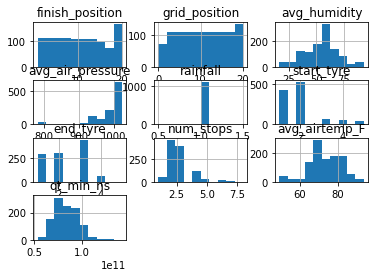

In [27]:
clean_df.hist()

In [28]:
clean_df.describe()

,finish_position,grid_position,avg_humidity,avg_air_pressure,rainfall,start_tyre,end_tyre,num_stops,qt_min,avg_airtemp_F,qt_min_ns
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.0,1101.000000,1101.000000,1101.000000,1101,1101.000000,1.101000e+03
mean,10.662125,10.043597,54.521774,986.840719,1.0,1.886467,2.257947,2.756585,0 days 00:01:23.478928247,73.630073,8.347893e+10
std,6.023915,5.734418,15.617216,47.801699,0.0,0.981098,0.922813,1.064623,0 days 00:00:12.526297107,8.804806,1.252630e+10
min,1.000000,0.000000,16.147619,780.509091,1.0,1.000000,1.000000,1.000000,0 days 00:00:53.400000,49.100000,5.340000e+10
25%,5.000000,5.000000,44.167969,986.484615,1.0,1.000000,1.000000,2.000000,0 days 00:01:15.400000,68.969023,7.540000e+10
50%,10.000000,10.000000,55.805233,1004.813433,1.0,2.000000,2.000000,3.000000,0 days 00:01:22.300000,72.958417,8.230000e+10
75%,16.000000,15.000000,64.471429,1013.797409,1.0,2.000000,3.000000,3.000000,0 days 00:01:31.900000,80.409587,9.190000e+10
max,20.000000,20.000000,93.524841,1023.131013,1.0,5.000000,5.000000,8.000000,0 days 00:02:21.600000,93.999322,1.416000e+11


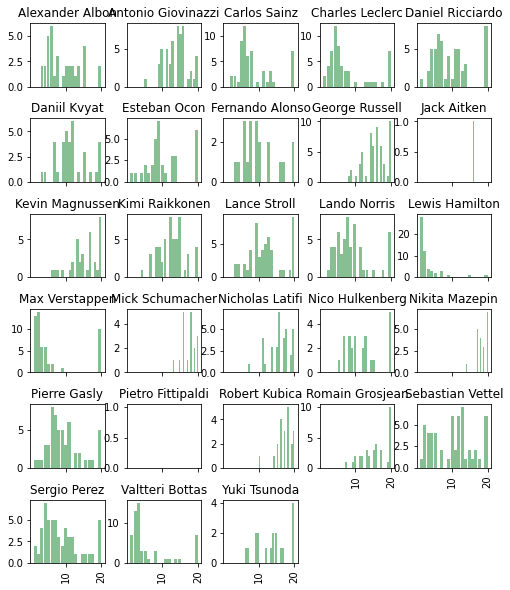

In [40]:
ax = clean_df.hist(column='finish_position', by='full_name', bins=20, grid=False, figsize=(8,10), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
